# Data visualization

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from os.path import join
import calendar
import altair as alt
from vega_datasets import data as vdata

cwd = os.getcwd()
data_path = join(cwd, '..', '..', 'data')

sns.set(style='white')

## Load data

In [33]:
path = join(data_path, 'processed', 'facility_gen_emissions.csv')
df = pd.read_csv(path)

In [34]:
df.head()

,plant_id,month,net_gen_mwh,primary_gen_fuel,state,facility_name,year,gross_load_mwh,heat_input_mmbtu,so2_kg,nox_kg,co2_kg
0,2,1,-77.112,HYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,-69.679,HYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,-48.374,HYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,4,-24.341,HYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,5,-11.476,HYC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.primary_gen_fuel.unique()

array(['HYC', 'NG', 'COL', 'NUC', 'DFO', 'HPS', 'GEO', 'WND', 'WOO',
       'RFO', 'WWW', 'PC', 'MLG', 'SUN', 'WOC', 'OTH', 'ORW', 'OOG'],
      dtype=object)

In [36]:
top_fuel = df.groupby('primary_gen_fuel')['net_gen_mwh'].sum().sort_values(ascending=False).index[:7]
top_fuel

Index(['NG', 'COL', 'NUC', 'HYC', 'WND', 'WWW', 'SUN'], dtype='object', name='primary_gen_fuel')

In [37]:
df = df.loc[df['primary_gen_fuel'].isin(top_fuel)]

## Matplotlib
[Matplotlib](https://matplotlib.org/) is probably the most popular Python plotting package and it improved significantly with version 2.0. If you can imagine a figure, and have several hours/days of spare time, you can probably make it with matplotlib. On the plus side it allows you to customize nearly every pixel on a figure.

Text(0,0.5,'Total generation (MWh)')

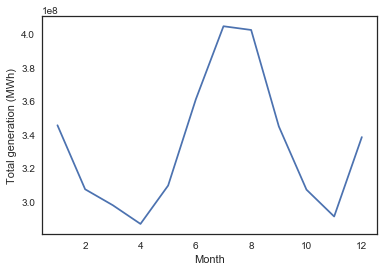

In [25]:
# group to generation by month
total_monthly = df.groupby('month', as_index=False).sum()

plt.plot(total_monthly.month, total_monthly.net_gen_mwh)
plt.xlabel('Month')
plt.ylabel('Total generation (MWh)')

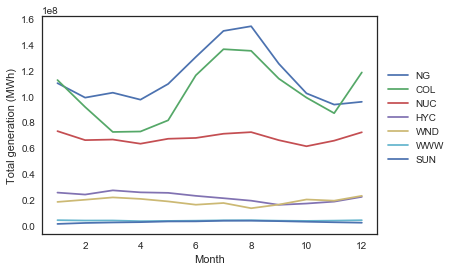

In [26]:
# group to generation by month and fuel
total_monthly_fuel = df.groupby(['month', 'primary_gen_fuel'], as_index=False).sum()

for fuel in top_fuel:
    # Set x and y values
    x = total_monthly_fuel.loc[total_monthly_fuel['primary_gen_fuel'] == fuel, 'month']
    y = total_monthly_fuel.loc[total_monthly_fuel['primary_gen_fuel'] == fuel, 'net_gen_mwh']
    plt.plot(x, y, label=fuel)
    
plt.xlabel('Month')
plt.ylabel('Total generation (MWh)')
plt.legend(loc=(1.02 , 0.3))

### Plot with Pandas
Pandas has several matplotlib wrapper methods that let you plot the data in a dataframe. It will use the information (e.g. column names) to provide some labels on the figure.

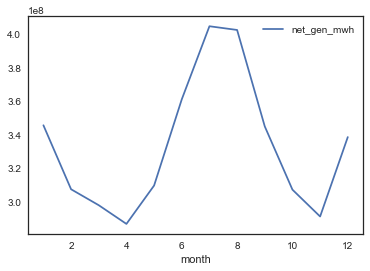

In [27]:
total_monthly.plot(x='month', y='net_gen_mwh')

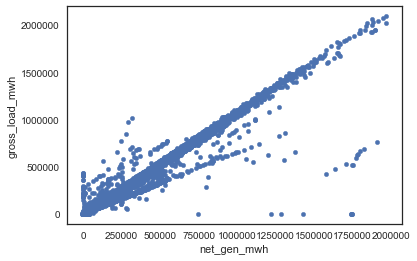

In [28]:
df.plot.scatter('net_gen_mwh', 'gross_load_mwh')

## Plot with Seaborn
Seaborn also wraps functions around matplotlib and provides much more powerful tools for exploring data. It was designed to work closely with Pandas dataframes. I highly recommend going through the [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html). 

### Distributions

/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


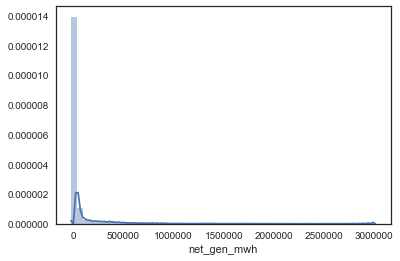

In [29]:
sns.distplot(df.net_gen_mwh)

/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


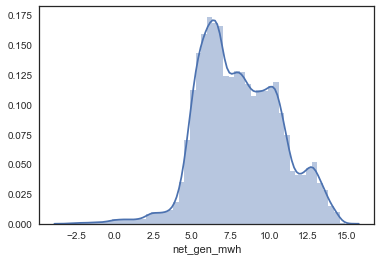

In [43]:
sns.distplot(df.loc[df['net_gen_mwh'] > 0, 'net_gen_mwh'].apply(np.log))

/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


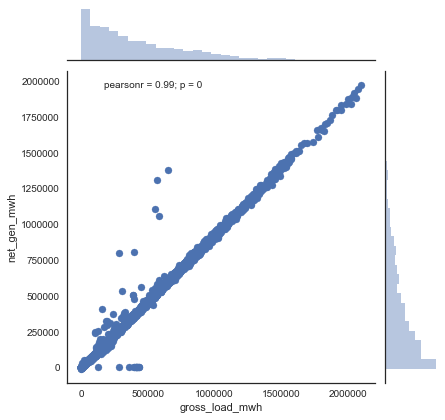

In [44]:
data = df.loc[df['primary_gen_fuel'] == 'COL']

sns.jointplot(x='gross_load_mwh', y='net_gen_mwh', data=data)

/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Home/anaconda/envs/pydata-issst/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


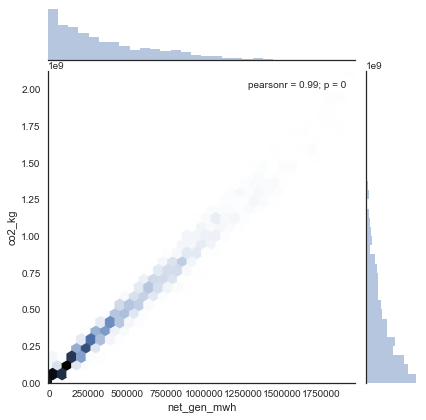

In [45]:
data = df.loc[df['primary_gen_fuel'] == 'COL']

sns.jointplot(x='net_gen_mwh', y='co2_kg', data=data, kind='hex')

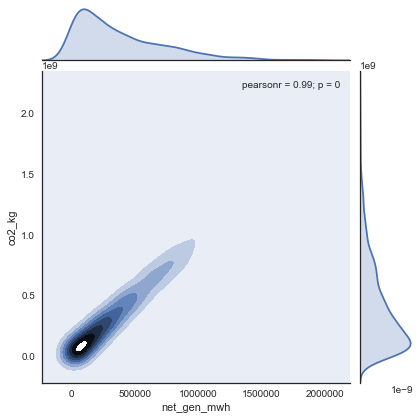

In [47]:
data = df.loc[df['primary_gen_fuel'] == 'COL']

sns.jointplot(x='net_gen_mwh', y='co2_kg', data=data, kind='kde')

### Categorical

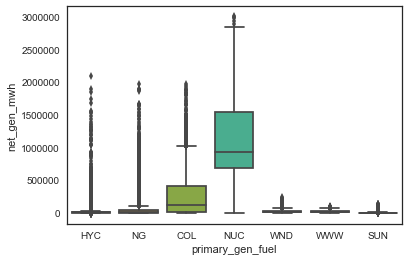

In [49]:
sns.boxplot(x='primary_gen_fuel', y='net_gen_mwh', data=df)

Now I'll use the month as an **ordinal** variable

In [13]:
def month_hours(month):
    'Look up the number of hours in a given month'

    # second value in tuple is number of days in a month
    days = calendar.monthrange(2016, month)[-1]
    hours = days * 24

    return hours

In [14]:
df['capacity_factor'] = df.loc[:, 'net_gen_mwh'] / (df.loc[:, 'nameplate_capacity_mw'] * df['month'].apply(month_hours))

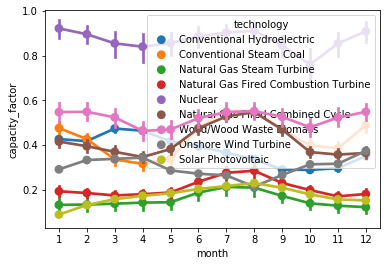

In [15]:
sns.pointplot(x='month', y='capacity_factor', hue='technology', data=df)

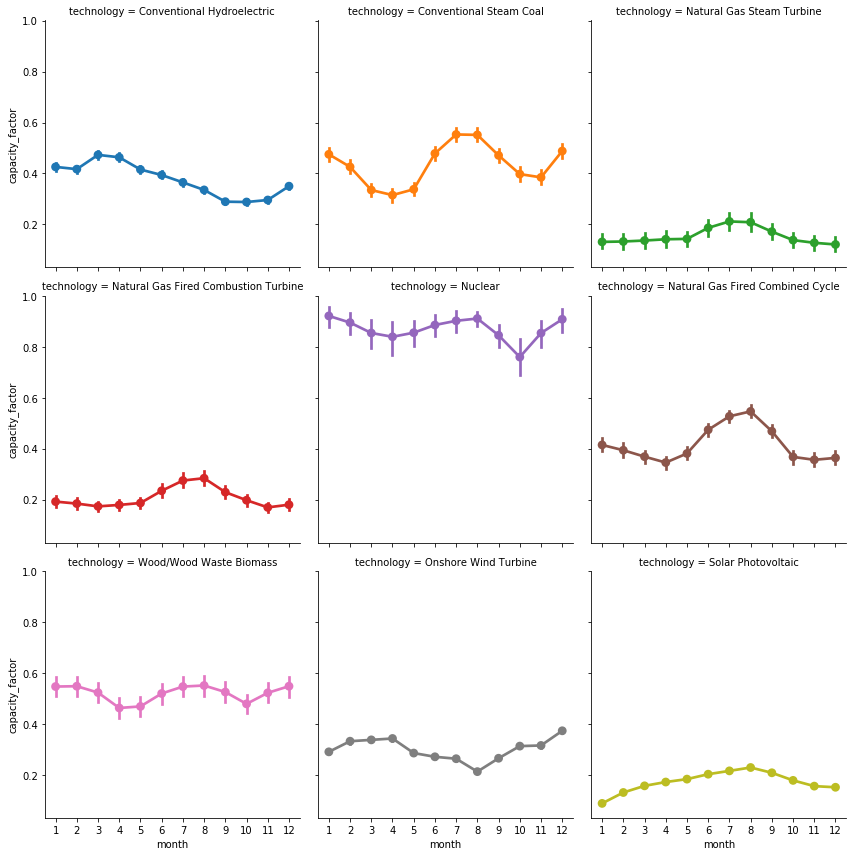

In [18]:
sns.factorplot(x='month', y='capacity_factor', hue='technology', col='technology',
               kind='point', col_wrap=3, data=df)

#### FacetGrid
FacetGrid is a lower-level but incredibly powerful plotting tool. It lets you create a grid with parameters splitting data by row, month, and hue. Then you can plot any function on that grid.

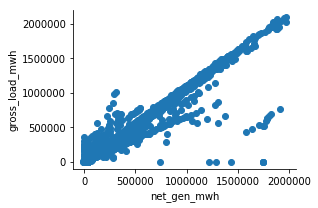

In [35]:
g = sns.FacetGrid(data=df, aspect=1.5)
g.map(plt.scatter, 'net_gen_mwh', 'gross_load_mwh')

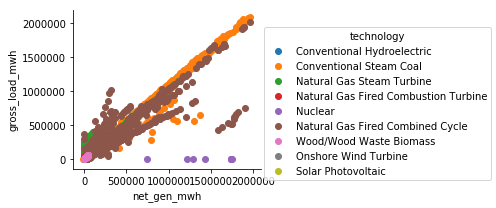

In [36]:
g = sns.FacetGrid(data=df, hue='technology', aspect=1.5)
g.map(plt.scatter, 'net_gen_mwh', 'gross_load_mwh')
g.add_legend()

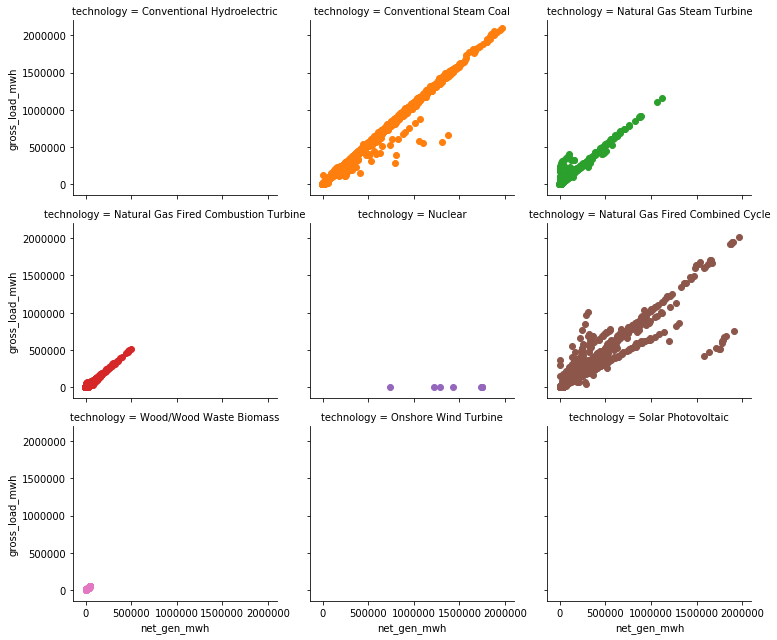

In [37]:
g = sns.FacetGrid(data=df, hue='technology', col='technology',
                  col_wrap=3, aspect=1.2)
g.map(plt.scatter, 'net_gen_mwh', 'gross_load_mwh')

What's the difference when we change hue to `month` rather than `technology`?

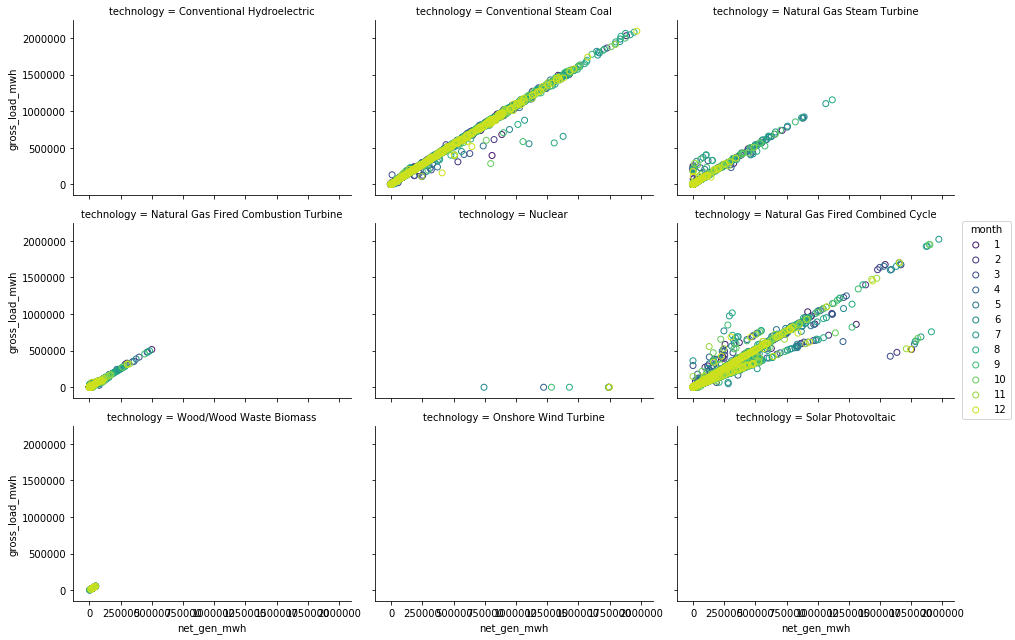

In [38]:
g = sns.FacetGrid(data=df, hue='month', col='technology',
                  col_wrap=3, aspect=1.5, palette='viridis')
g.map(plt.scatter, 'net_gen_mwh', 'gross_load_mwh', facecolors='none')
g.add_legend()

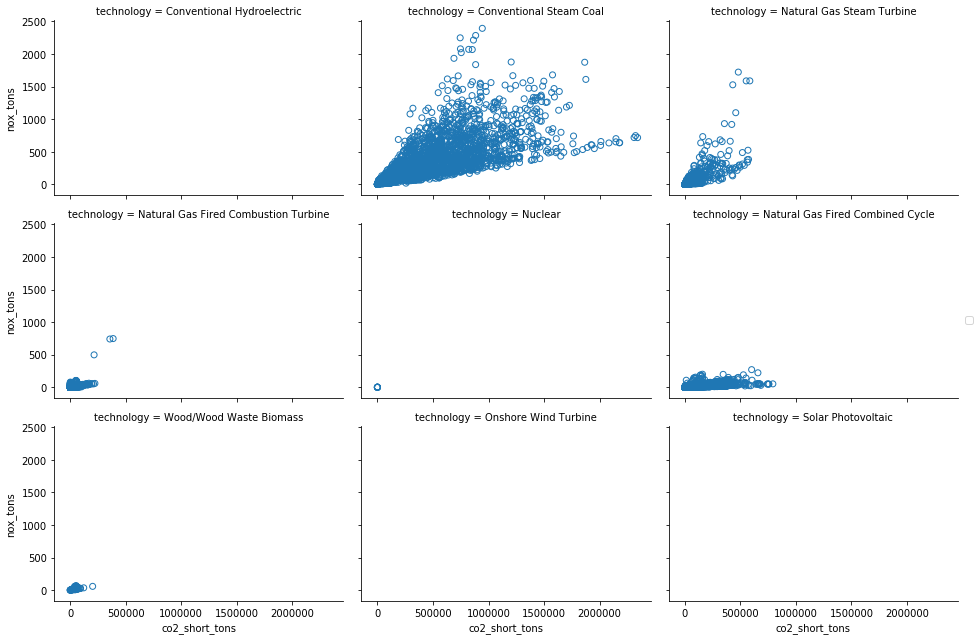

In [39]:
g = sns.FacetGrid(data=df, col='technology', col_wrap=3, aspect=1.5)
g.map(plt.scatter, 'co2_short_tons', 'nox_tons', facecolors='none')
g.add_legend()

## Regressions

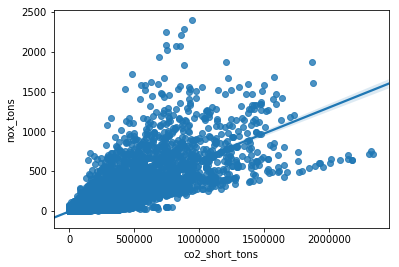

In [40]:
sns.regplot('co2_short_tons', 'nox_tons', data=df)

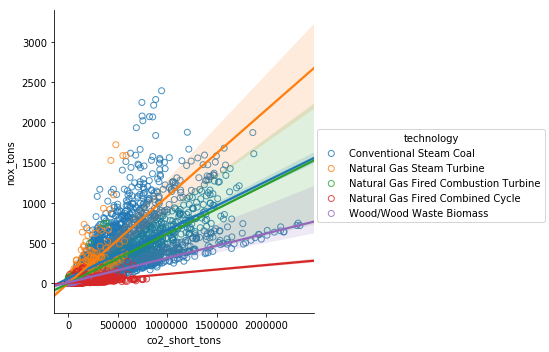

In [50]:
sns.lmplot('co2_short_tons', 'nox_tons', data=df.loc[df.technology != 'Nuclear'].dropna(),
           hue='technology', scatter_kws={'facecolor': 'none'})